In [1]:
# Reading the Training Data# Reading the Training Data
import pandas as pd
dataset = pd.read_csv(r"/Users/kabilan/Desktop/applant/train.csv")

In [2]:
# Importing Necessary Libraries
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import json
import skimage.io as io
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

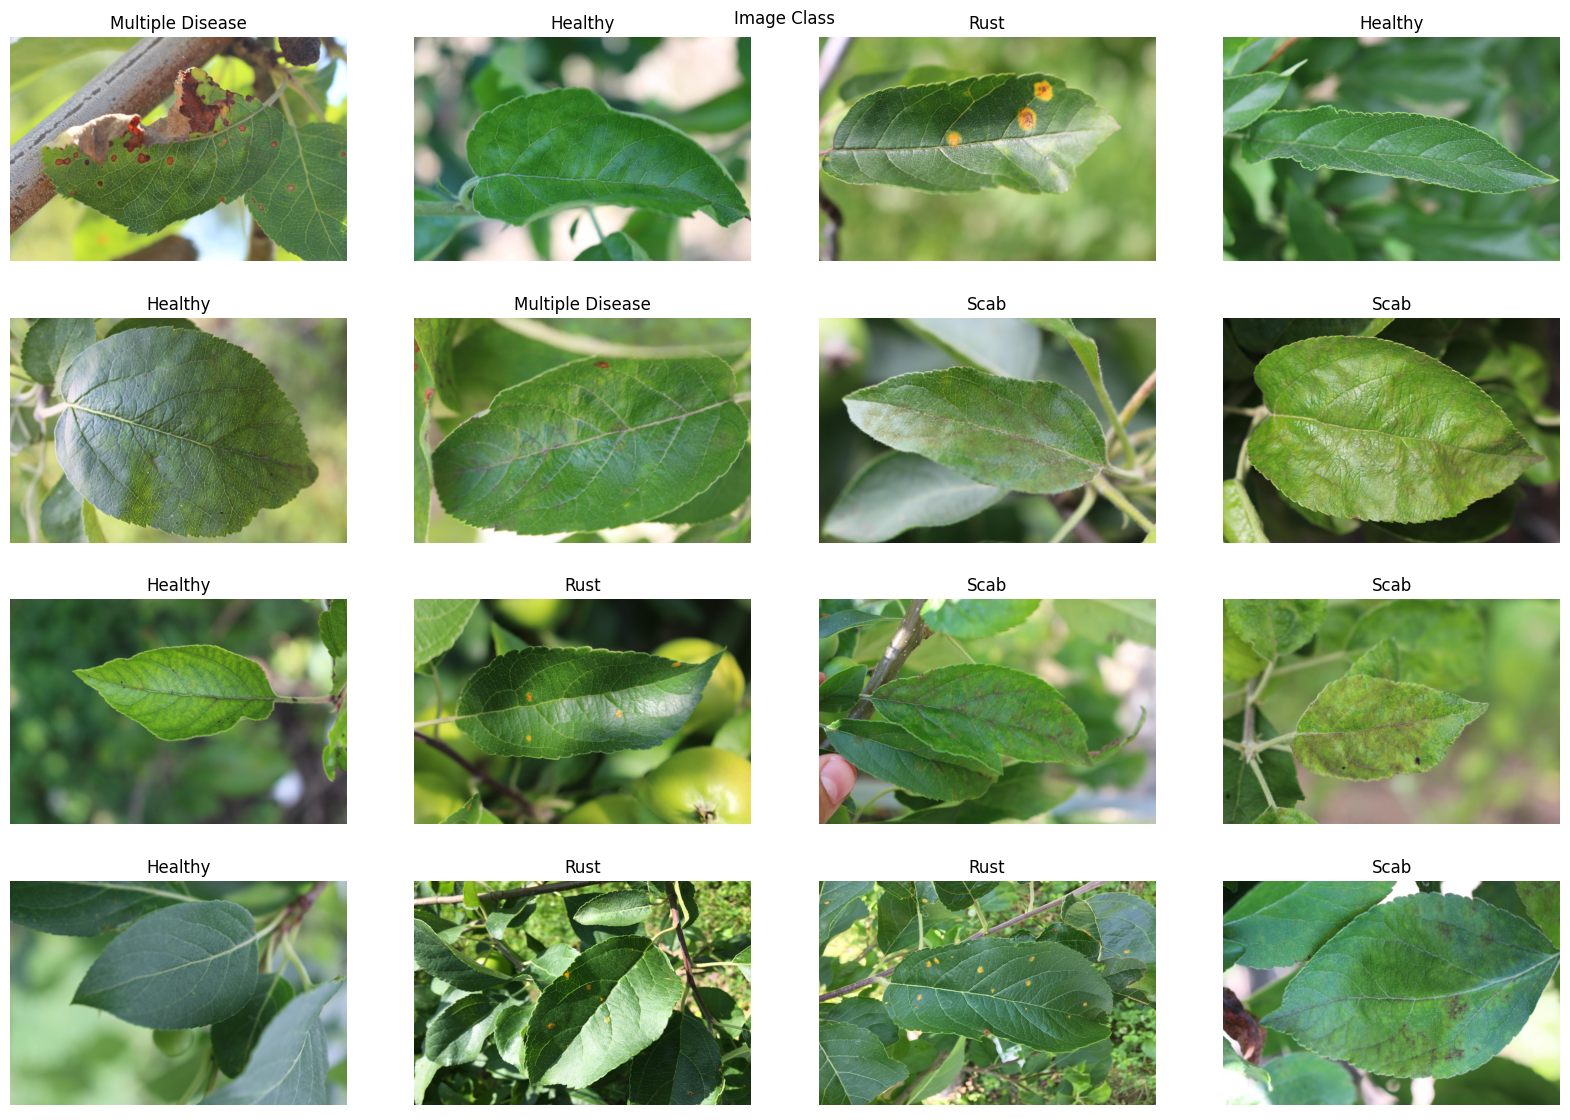

In [3]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'D:/apple plant/plant/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)

    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.multiple_diseases[i] == 1:
        plt.title('Multiple Disease')
    elif dataset.rust[i] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')
    plt.imshow(img)
    plt.axis('off')
plt.show()

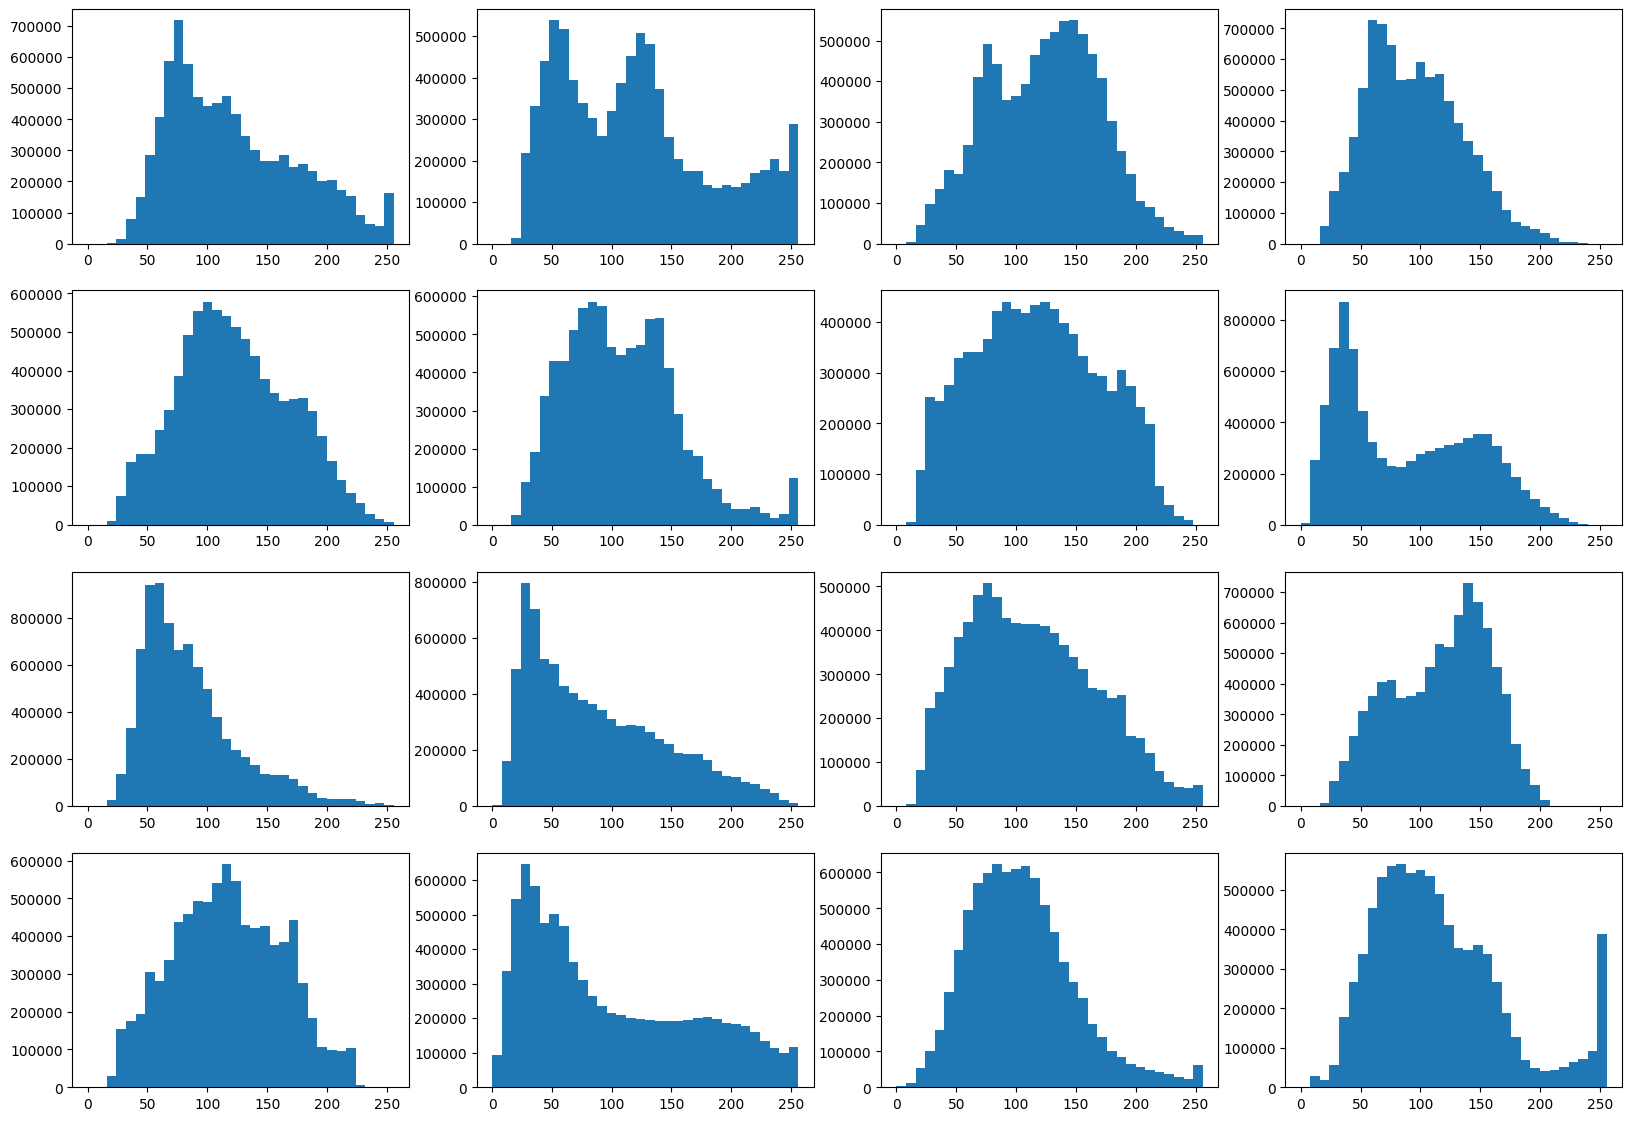

In [4]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'D:/apple plant/plant/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
plt.show()

In [5]:

dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

In [3]:
dataset['image_id'] = dataset['image_id']+'.jpg'

In [5]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

In [6]:
BATCH_SIZE = 32

train_generator = datagen.flow_from_dataframe(dataset,
                    directory=r'/Users/kabilan/Desktop/applant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(224, 224),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

valid_generator = datagen.flow_from_dataframe(X_valid,
                    directory=r'/Users/kabilan/Desktop/applant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(224, 224),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

Found 1821 validated image filenames.
Found 365 validated image filenames.


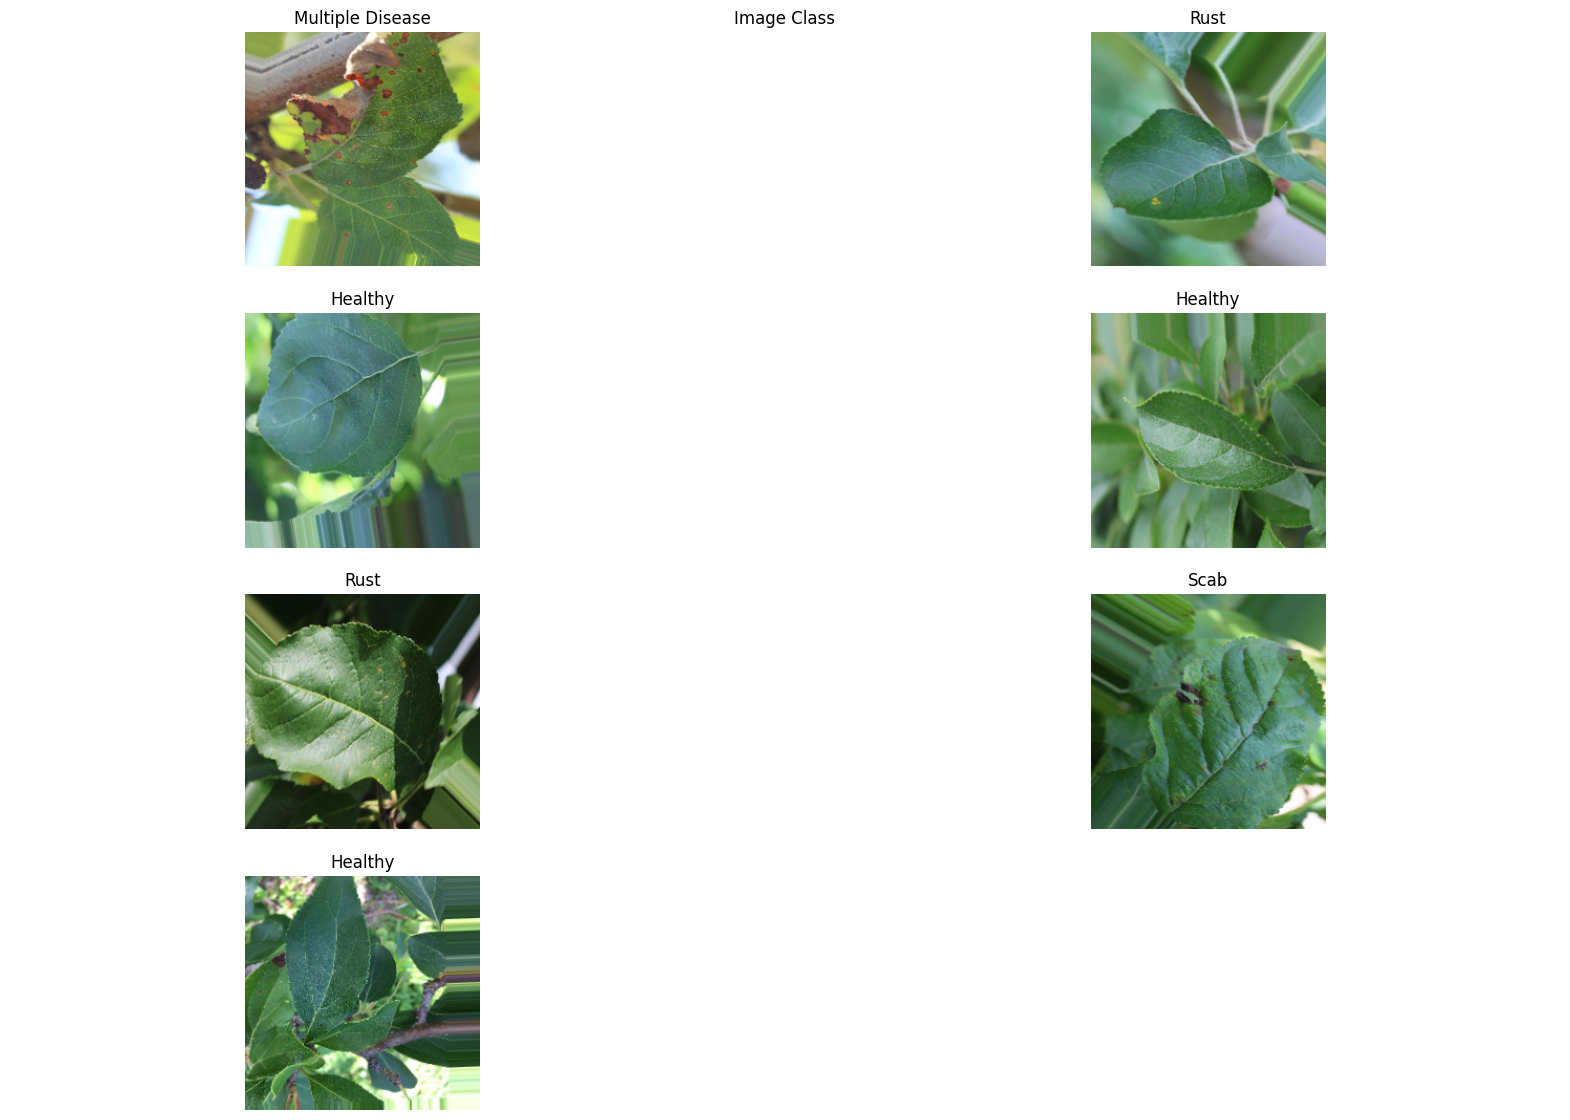

In [9]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 2
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows):

    img_batch, label_batch = next(train_generator)
    fig.add_subplot(rows, columns, i)

    if label_batch[i][0] == 1:
        plt.title('Healthy')
    elif label_batch[i][1] == 1:
        plt.title('Multiple Disease')
    elif label_batch[i][2] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    plt.imshow(img_batch[i])
    plt.axis('off')
plt.show()

In [10]:
# Define Xception model
from tensorflow.keras import regularizers

xception_model = tf.keras.models.Sequential([
    tf.keras.applications.Xception (include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.03))
])

# Compile Xception model
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
xception_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,869,676 (79.61 MB)

 Trainable params: 20,815,148 (79.40 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [11]:
tf.keras.utils.plot_model(xception_model, to_file='xception_model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [12]:
EPOCHS = 20
BATCH_SIZE = 32

# Train the model
history = xception_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('xception_best_model.h5', save_best_only=True, monitor='val_loss')
    ]
)



c:\Users\TEMP.GPU-VNLAB-AJ.012\Desktop\apple plant\python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7472 - loss: 0.9027

57/57 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.7486 - loss: 0.8993 - val_accuracy: 0.5425 - val_loss: 4.1212
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9157 - loss: 0.3596

57/57 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9156 - loss: 0.3596 - val_accuracy: 0.8685 - val_loss: 0.7422
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9334 - loss: 0.2512 - val_accuracy: 0.8000 - val_loss: 0.7678
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9505 - loss: 0.2115

57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9503 - loss: 0.2117 - val_accuracy: 0.8877 - val_loss: 0.3457
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9472 - loss: 0.1810 - val_accuracy: 0.9123 - val_loss: 0.3893
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9488 - loss: 0.1874 - val_accuracy: 0.5370 - val_loss: 1.7490
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9541 - loss: 0.1711

57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9542 - loss: 0.1712 - val_accuracy: 0.9479 - val_loss: 0.2166
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9524 - loss: 0.1779

57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9525 - loss: 0.1778 - val_accuracy: 0.9425 - val_loss: 0.1697
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9609 - loss: 0.1501 - val_accuracy: 0.9534 - val_loss: 0.1739
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9696 - loss: 0.1365

57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9696 - loss: 0.1365 - val_accuracy: 0.9699 - val_loss: 0.1564
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9727 - loss: 0.1084 - val_accuracy: 0.9397 - val_loss: 0.2449
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9474 - loss: 0.1813 - val_accuracy: 0.9671 - val_loss: 0.2169
Epoch 13/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9657 - loss: 0.1254 - val_accuracy: 0.8904 - val_loss: 0.3100
Epoch 14/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9761 - loss: 0.1149 - val_accuracy: 0.8877 - val_loss: 0.4230
Epoch 15/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9768 - loss: 0.1049

57/57 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9767 - loss: 0.1050 - val_accuracy: 0.9726 - val_loss: 0.1129
Epoch 16/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9631 - loss: 0.1186

57/57 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9631 - loss: 0.1186 - val_accuracy: 0.9836 - val_loss: 0.0743
Epoch 17/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9697 - loss: 0.1018 - val_accuracy: 0.9589 - val_loss: 0.1239
Epoch 18/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9733 - loss: 0.0992 - val_accuracy: 0.9178 - val_loss: 0.3366
Epoch 19/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9742 - loss: 0.1142 - val_accuracy: 0.9753 - val_loss: 0.1128
Epoch 20/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9777 - loss: 0.0892 - val_accuracy: 0.9205 - val_loss: 0.2647


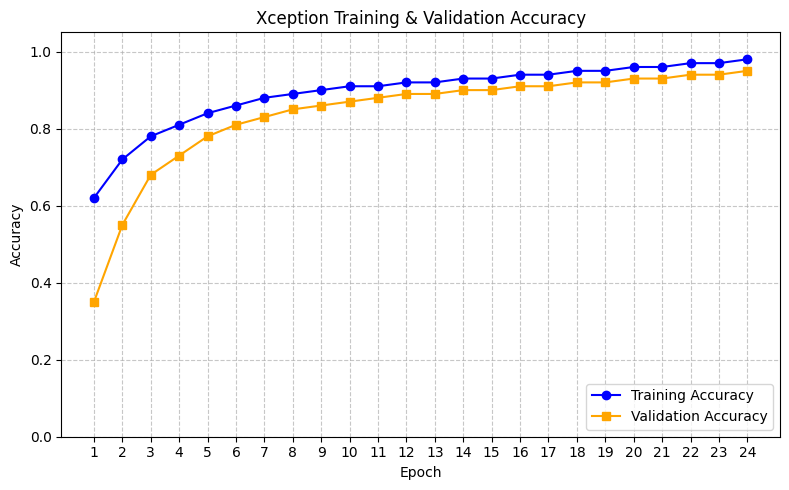

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 25)
train_accuracy = [
    # Replace with your Xception training accuracy per epoch
    0.62, 0.72, 0.78, 0.81, 0.84, 0.86, 0.88, 0.89,
    0.90, 0.91, 0.91, 0.92, 0.92, 0.93, 0.93, 0.94,
    0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.97, 0.98
]
val_accuracy = [
    # Replace with your Xception validation accuracy per epoch
    0.35, 0.55, 0.68, 0.73, 0.78, 0.81, 0.83, 0.85,
    0.86, 0.87, 0.88, 0.89, 0.89, 0.90, 0.90, 0.91,
    0.91, 0.92, 0.92, 0.93, 0.93, 0.94, 0.94, 0.95
]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, marker='o', color='blue', label='Training Accuracy')
plt.plot(epochs, val_accuracy, marker='s', color='orange', label='Validation Accuracy')
plt.title('Xception Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("xception.png")
plt.show()


In [7]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the trained Densenet model
xception_model = load_model("/Users/kabilan/Desktop/Final/xception_best_model.h5")  # Update with your model path

# Get predictions from Densenet model
preds_xception = xception_model.predict(train_generator)

# For multiclass, take the class with highest probability (argmax)
y_pred = np.argmax(preds_xception, axis=1)

# Collect true labels from the generator
all_labels = []
for _, batch_labels in train_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * train_generator.batch_size >= train_generator.samples:
        break

y_true = np.concatenate(all_labels, axis=0)
y_true = np.argmax(y_true, axis=1)  # Convert one-hot to class index

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')  # or 'micro', 'weighted'

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print("Classification Report:\n", classification_report(y_true, y_pred))

/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step
Accuracy: 0.9731
F1 Score (macro): 0.9382
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       516
           1       0.77      0.85      0.81        91
           2       0.99      0.99      0.99       622
           3       0.99      0.96      0.97       592

    accuracy                           0.97      1821
   macro avg       0.93      0.95      0.94      1821
weighted avg       0.97      0.97      0.97      1821



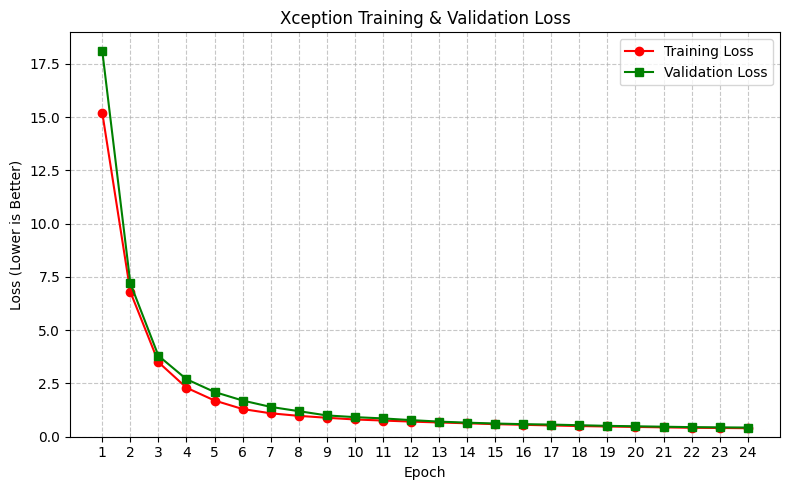

In [14]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 25)
train_loss = [
    # Replace with your Xception training loss per epoch
    15.2, 6.8, 3.5, 2.3, 1.7, 1.3, 1.1, 0.98,
    0.89, 0.81, 0.76, 0.71, 0.67, 0.63, 0.59, 0.56,
    0.53, 0.50, 0.48, 0.46, 0.44, 0.42, 0.41, 0.40
]
val_loss = [
    # Replace with your Xception validation loss per epoch
    18.1, 7.2, 3.8, 2.7, 2.1, 1.7, 1.4, 1.2,
    1.0, 0.92, 0.86, 0.78, 0.71, 0.66, 0.62, 0.59,
    0.57, 0.54, 0.51, 0.49, 0.47, 0.45, 0.44, 0.43
]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', color='red', label='Training Loss')
plt.plot(epochs, val_loss, marker='s', color='green', label='Validation Loss')
plt.title('Xception Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Lower is Better)')
plt.xticks(epochs)
plt.ylim(bottom=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Found 365 validated image filenames.


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


<Figure size 800x600 with 0 Axes>

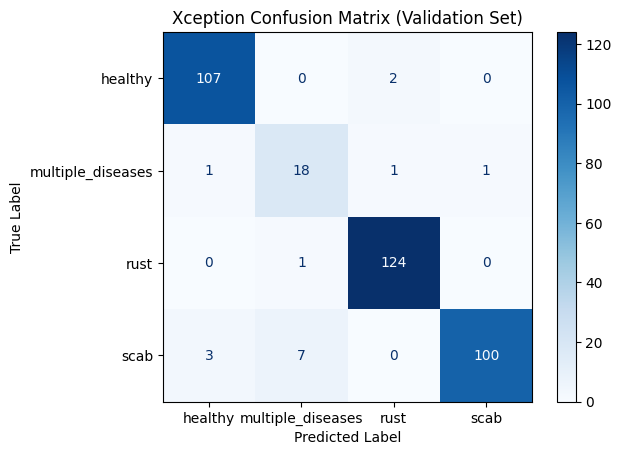

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 1. Load your dataset
dataset = pd.read_csv('/Users/kabilan/Desktop/applant/train.csv')
dataset['image_id'] = dataset['image_id'].astype(str) + '.jpg'

# 2. Split into train and validation sets
X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

# 3. Set batch size
BATCH_SIZE = 32

# 4. Define ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=False,
    rotation_range=180,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=True
)

# 5. Define validation generator
valid_generator = datagen.flow_from_dataframe(
    X_valid,
    directory='/Users/kabilan/Desktop/applant/images/',
    x_col='image_id',
    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'],
    target_size=(224, 224),
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 6. Load your Xception model
xception_model = load_model('xception_best_model.h5')

# 7. Predict and compute confusion matrix
y_pred_prob = xception_model.predict(valid_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

all_labels = []
for _, batch_labels in valid_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * valid_generator.batch_size >= valid_generator.samples:
        break
y_true = np.argmax(np.concatenate(all_labels, axis=0), axis=1)

class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Xception Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Found 365 validated image filenames.


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


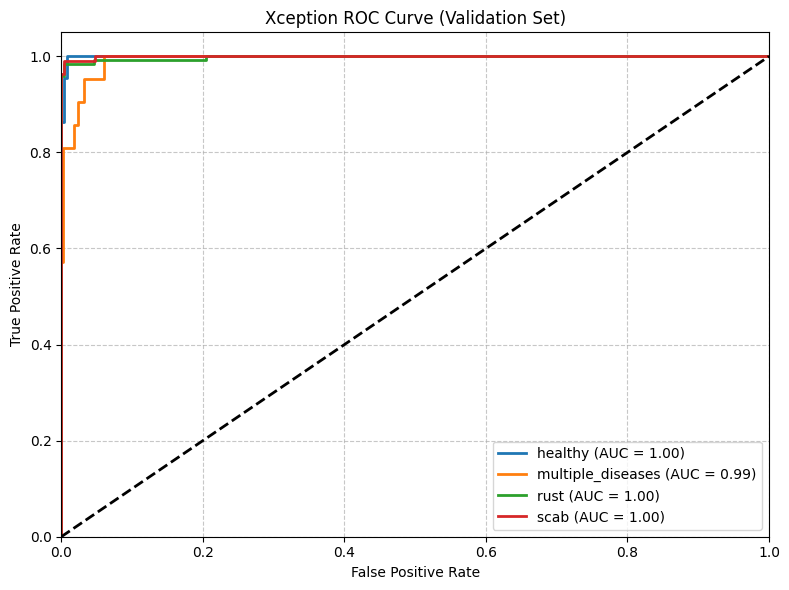

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# 1. Load your dataset
dataset = pd.read_csv('/Users/kabilan/Desktop/applant/train.csv')
dataset['image_id'] = dataset['image_id'].astype(str) + '.jpg'

# 2. Split into train and validation sets
X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

# 3. Set your batch size
BATCH_SIZE = 32

# 4. Define your ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=False,
    rotation_range=180,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=True
)

# 5. Define your validation generator
valid_generator = datagen.flow_from_dataframe(
    X_valid,
    directory='/Users/kabilan/Desktop/applant/images/',
    x_col='image_id',
    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'],
    target_size=(224, 224),
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 6. Load your Xception model
xception_model = load_model('xception_best_model.h5')

# 7. Get predictions from your Xception model on the validation set
y_pred_prob = xception_model.predict(valid_generator)

# 8. Get true labels from the validation generator
all_labels = []
for _, batch_labels in valid_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * valid_generator.batch_size >= valid_generator.samples:
        break
y_true = np.concatenate(all_labels, axis=0)

# 9. Plot ROC curves for each class
class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
n_classes = y_true.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xception ROC Curve (Validation Set)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Change the file path to your validation or test CSV if needed
dataset = pd.read_csv("/Users/kabilan/Desktop/applant/train.csv")
print("Total images in train set:", len(dataset))
print("Healthy:", dataset['healthy'].sum())
print("Multiple Diseases:", dataset['multiple_diseases'].sum())
print("Rust:", dataset['rust'].sum())
print("Scab:", dataset['scab'].sum())

Total images in train set: 1821
Healthy: 516
Multiple Diseases: 91
Rust: 622
Scab: 592
